age
sex
chest pain type (4 values) = dor no peito 
resting blood pressure =  pressão arterial em repolso
serum cholestoral in mg/dl = colesterol serico
fasting blood sugar > 120 mg/dl = açucar no sangue em jejum
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.




In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Doenças no coração

In [86]:
df = pd.read_csv('heart.csv')
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
111,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
384,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
794,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
927,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
130,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
131,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
307,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
439,58,1,1,120,284,0,0,160,0,1.8,1,0,2,0
478,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
132,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [88]:
df.isnull().sum() # -> ira somar todos os valores nulos de todas as colunas

# não há valores nulos em df

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
df.duplicated().sum() # -> avaliar se ha valores duplicados, importante remover para não haver overfit


723

In [90]:
# hd - > heart disease

hd = df.drop_duplicates()
hd.duplicated().sum()

0

In [91]:
# hd.rename(colunms = {dp})

In [92]:
hd.describe() # -> ver as estatisticas outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

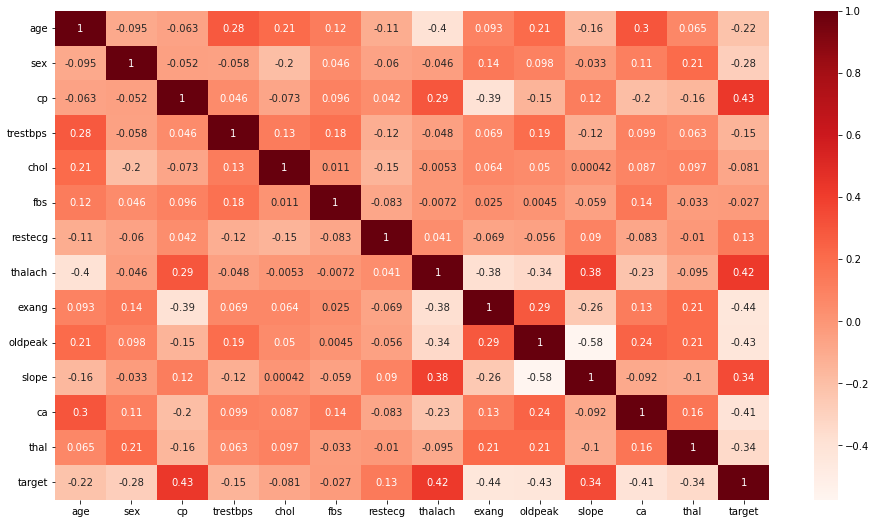

In [93]:
plt.figure(figsize = (16,9))
sns.heatmap(hd.corr(), annot = True , cmap = 'Reds') # annot = os valores da coluna

# correlação entre os numero das colunas em mapa de calor

#### maiores correlaçoes com o alvo são:
 * slope = the slope of the peak exercise ST segment 
 * thalach = resting electrocardiographic results (values 0,1,2) = resultados eletrocadiograficos 
 * cp = chest pain type (4 values)
 

### separando os tipos de variaveis 

In [94]:
categoricas = []
numericas = []
for valores in hd.columns :
    print(f'{valores} : {hd[valores].nunique()}') 
    if hd[valores].nunique() <= 5: # são o maximo de categorias nos dados
        categoricas.append(valores)
    else:
        numericas.append(valores)
categoricas.remove('target')
print('---'*40)
print(f' variaveis categoricas = {categoricas} ')
print(f' variaveis numericas = {numericas} ')


age : 41
sex : 2
cp : 4
trestbps : 49
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
target : 2
------------------------------------------------------------------------------------------------------------------------
 variaveis categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] 
 variaveis numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] 


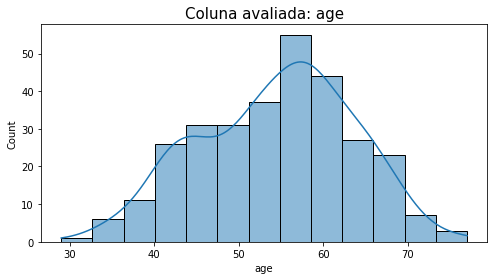

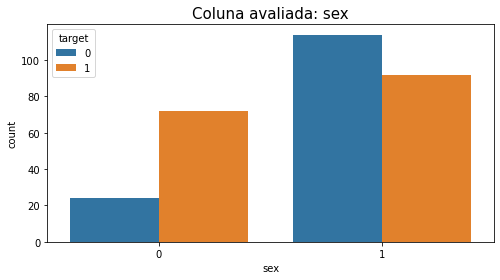

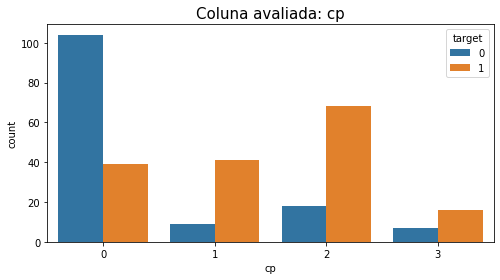

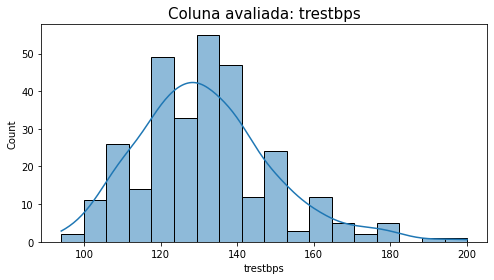

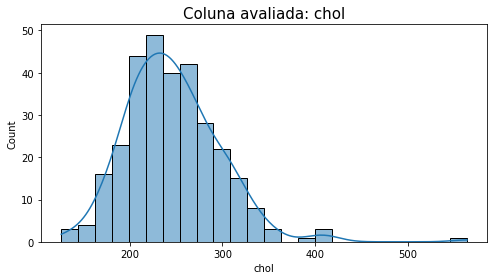

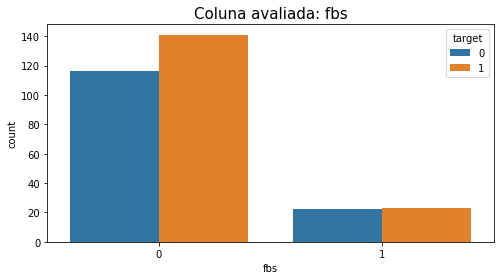

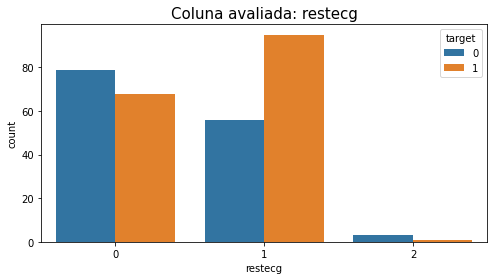

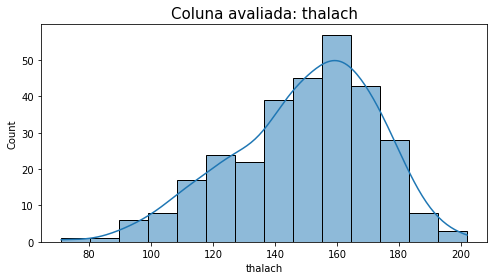

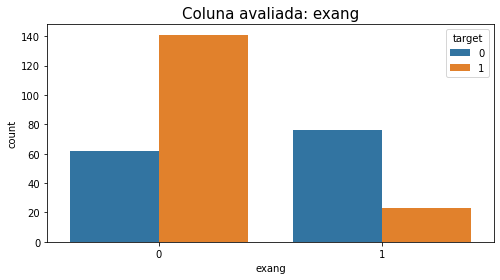

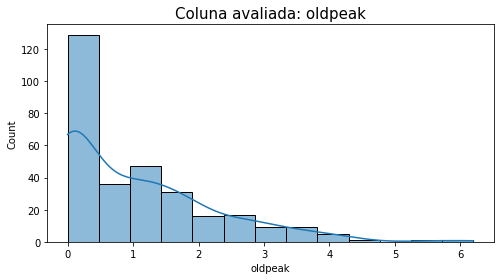

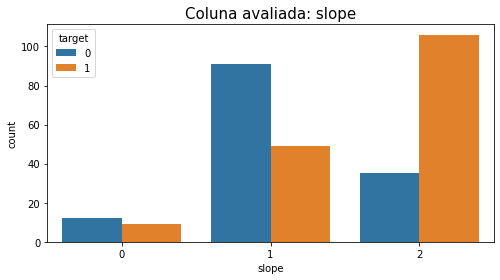

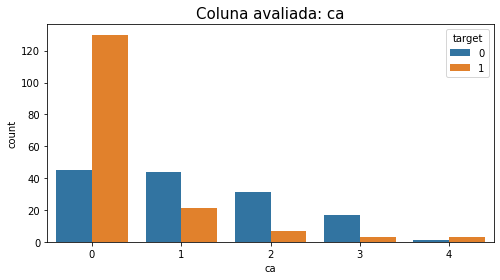

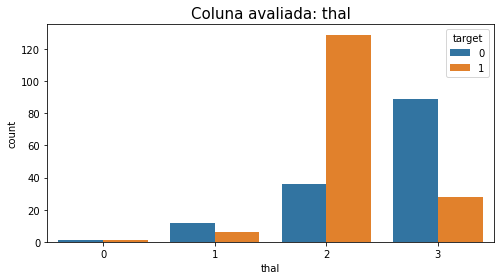

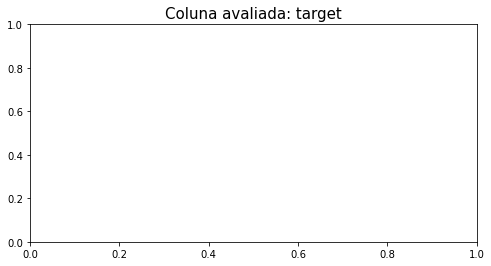

In [95]:
for colunas in hd.columns :
    plt.figure(figsize =(8, 4)) # separa os graficos
    plt.title(f'Coluna avaliada: {colunas}', fontsize = 15)
    if colunas in categoricas:
        sns.countplot(x = hd[colunas], hue = hd['target'] ) # hue legenda
    if colunas in numericas:
        sns.histplot(hd[colunas], kde = True ) # linha de marcação

### confirmando e removendo outliers

<AxesSubplot:>

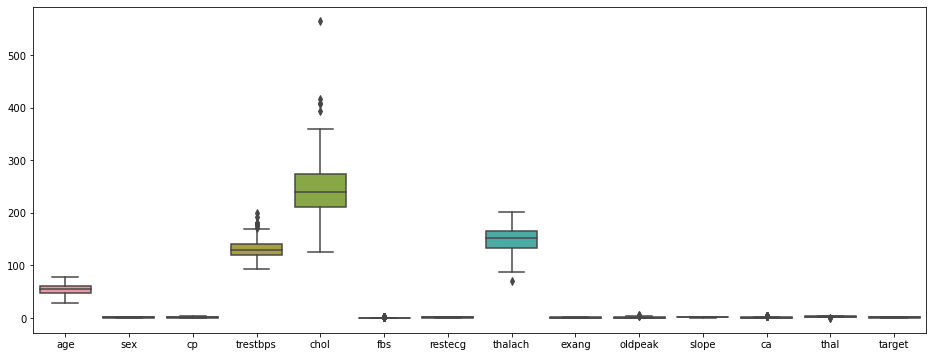

In [96]:
plt.figure(figsize = (16,6)) # a mascara da figura foi montada
sns.boxplot(data = hd)

In [97]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


 #### tem outlier em:
    * trestbps
    * chol
    * thalach

In [98]:
hd['trestbps'].quantile(1) # que isso


200.0

#### tirando de 'trestbps'

<AxesSubplot:>

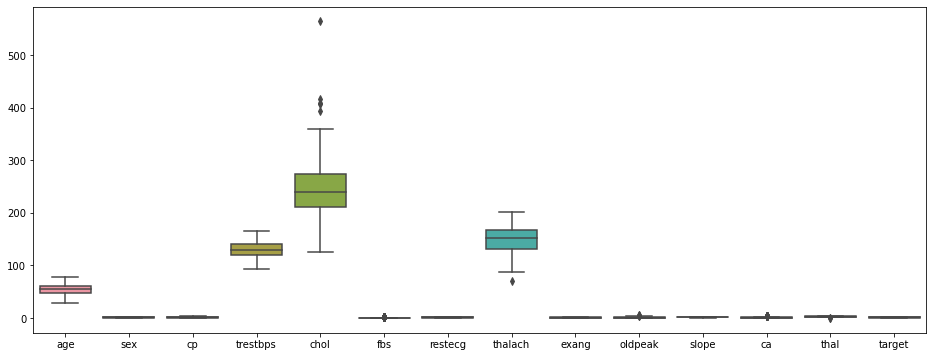

In [99]:
hd1 = hd[ hd['trestbps'] < hd['trestbps'].quantile(0.97)] #selecionei todos os valores a baixo de 97% do valor maximo
plt.figure(figsize = (16,6))
sns.boxplot(data = hd1)

In [100]:
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,54.193772,0.688581,0.958478,129.515571,245.446367,0.138408,0.529412,149.501730,0.314879,1.014879,1.415225,0.726644,2.301038,0.553633
std,9.132350,0.463877,1.019773,14.743899,51.954488,0.345927,0.520416,23.108759,0.465273,1.130582,0.607171,1.012774,0.608988,0.497977
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,167.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### tirando de chol

<AxesSubplot:>

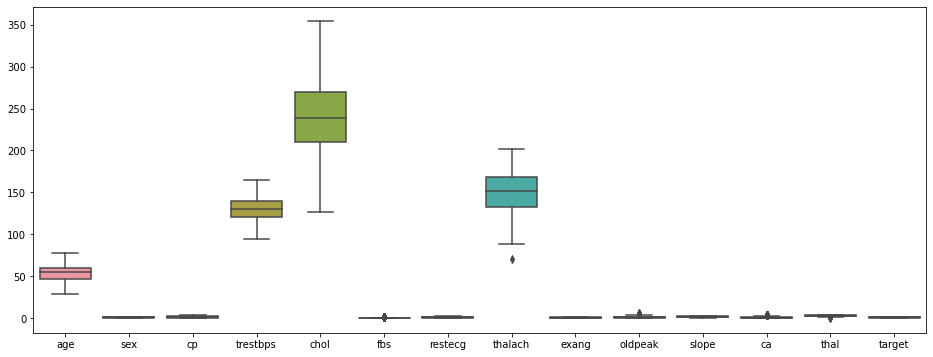

In [101]:
hd1 = hd1[ hd1['chol'] < hd1['chol'].quantile(0.98)]# all
plt.figure(figsize = (16,6))
sns.boxplot(data = hd1)

In [102]:
hd1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,54.007067,0.703180,0.957597,129.296820,241.636042,0.137809,0.540636,149.388693,0.318021,1.000000,1.416961,0.720848,2.296820,0.551237
std,9.122878,0.457666,1.020171,14.682583,44.336460,0.345310,0.520102,23.334390,0.466533,1.126565,0.609612,1.008733,0.610392,0.498249
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.500000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,165.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### tirando de thalach

<AxesSubplot:>

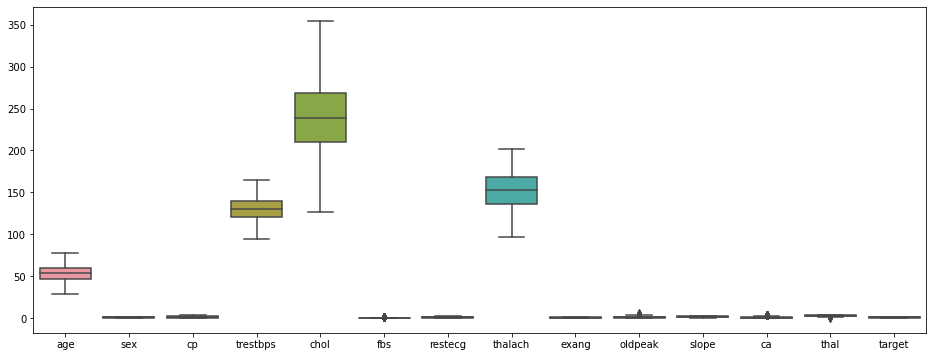

In [128]:
hd1 = hd1[ hd1['thalach'] > hd1['thalach'].quantile(0.01)] #tirar 1% do inicio dos dados pois o outlier esta para baixo
plt.figure(figsize = (16,6))
sns.boxplot(data = hd1)

# Machine learning


In [129]:
hd2 = pd.get_dummies(hd1, columns =  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']) # ?
hd2.sample(10)
# trasformar os dados categoricos em 0 e 1

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
237,57,124,261,141,0.3,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
166,56,132,184,105,2.1,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
90,54,108,267,167,0.0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
437,67,120,229,129,2.6,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
49,60,117,230,160,1.4,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
301,51,94,227,154,0.0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
25,61,145,307,146,1.0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
599,63,140,195,179,0.0,1,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
52,38,138,175,173,0.0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
274,66,160,228,138,2.3,1,0,1,1,0,...,1,1,0,0,0,0,0,1,0,0


In [130]:
x = hd2.drop('target', axis = 1)
y = hd2['target']

In [131]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 277, dtype: int64

In [252]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score

X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state = 1) # 20 % para teste 80% para treino


In [200]:
modelo_LR = LinearRegression()
modelo_RF = RandomForestRegressor()
modelo_lg = LogisticRegression(max_iter = 1000)

# treino 

modelo_LR.fit(X_train, y_train)
modelo_RF.fit(X_train, y_train)
modelo_lg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

#### acuracia de treino

In [228]:
modelo_LR.score(X_train, y_train)* 100 

59.93730253969394

In [227]:
modelo_RF.score(X_train, y_train) *100

92.95662393162392

In [226]:
modelo_lg.score(X_train, y_train) *100

89.14027149321268

#### acuaria de teste

In [236]:
modelo_lg.score(X_test, y_test) * 100


80.35714285714286

In [230]:
modelo_RF.score(X_test, y_test) * 100

31.934619883040938

In [231]:
modelo_LR.score(X_test, y_test) * 100

40.27748883135756

### R^2

In [277]:
revisão_LR = modelo_LR.predict(X_test)
revisão_RF = modelo_RF.predict(X_test)
revisão_lg = modelo_lg.predict(X_test)

print(f' acurcia de regressão linear é {round(r2_score(y_test,revisão_LR ) * 100, 2)} %')
print(f' acurcia de arvore de decisão é {round(r2_score(y_test, revisão_RF, ) * 100, 2)} %')

 acurcia de regressão linear é 40.28 %
 acurcia de arvore de decisão é 31.93 %


#### grafico R^2

<AxesSubplot:>

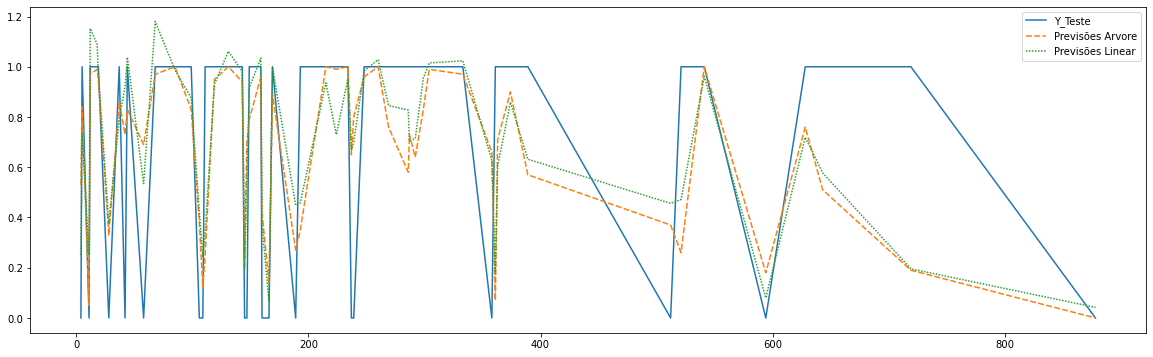

In [243]:
tabela = pd.DataFrame() 
tabela['Y_Teste'] = y_test
tabela['Previsões Arvore'] = revisão_RF
tabela['Previsões Linear'] = revisão_LR
tabela['previsão logistica'] = revisão_lg
plt.figure(figsize = (20,6))
sns.lineplot(data = tabela)


<AxesSubplot:>

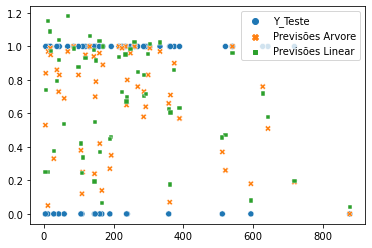

In [287]:
sns.scatterplot(data = tabela)

<AxesSubplot:>

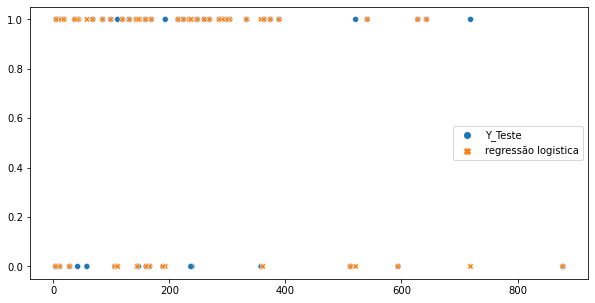

In [282]:
tabela_lg = pd.DataFrame() 
tabela_lg['Y_Teste'] = y_test
tabela_lg['regressão logistica'] = revisão_lg
plt.figure(figsize = (10, 5))
sns.scatterplot(data = tabela_lg)

<AxesSubplot:>

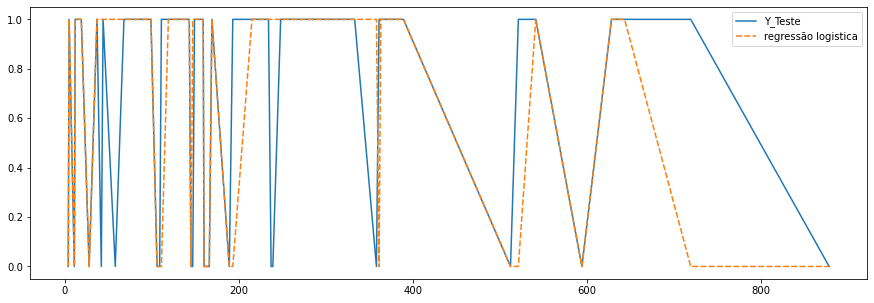

In [285]:
plt.figure(figsize = (15, 5))
sns.lineplot(data = tabela_lg)

#### valor da acuracia, f1 e revocação

In [272]:
print(classification_report(y_test, revisão_lg))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       0.85      0.87      0.86        38

    accuracy                           0.80        56
   macro avg       0.78      0.77      0.77        56
weighted avg       0.80      0.80      0.80        56

